# **Linear Regression (using Pytorch)**
## **Import Libraries**

In [33]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## **Create Data**

- Create a straight line dataset using the linear regression formula `(weight * X + bias)`.
- Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
- Split the data into `80%` training, `20%` testing.
- Plot the training and testing data so it becomes visual.

Total Data: 110 | Training Data: 88 | Test Data: 22


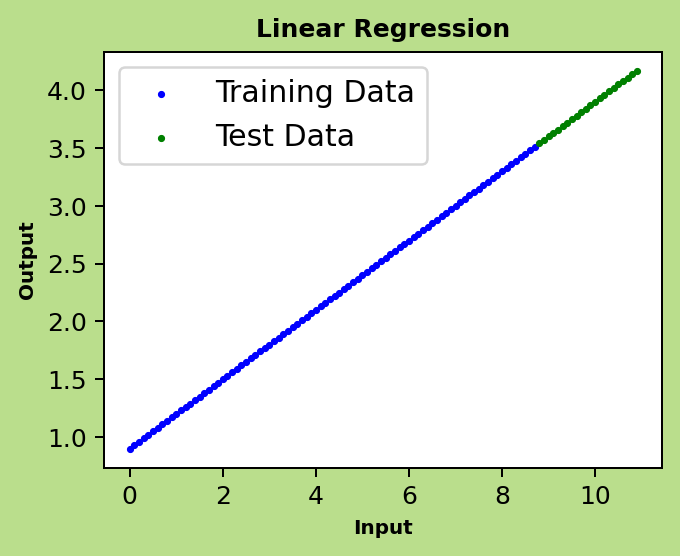

In [ ]:
# Data
weight = 0.3
bias = 0.9
start = 0
end = 11
step = 0.1
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f'Total Data: {len(X)} | Training Data: {len(X_train)} | Test Data: {len(X_test)}')

# Visualize
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(4,3), dpi=180, facecolor='#bade8c')

  label_font = {'size':8,
                'color':'k',
                'weight':'bold'}
  title_font = {'size':10,
                'color':'k',
                'weight':'bold'}
  plt.xlabel('Input', fontdict=label_font)
  plt.ylabel('Output', fontdict=label_font)
  plt.title('Linear Regression', fontdict=title_font)

  plt.scatter(X_train, y_train, s=3.5, c='b', label='Training Data')
  plt.scatter(X_test, y_test, c='g', s=3.5, label='Test Data')
  if predictions is not None:
    plt.scatter(X_test, predictions, c='r', s=3.5, label='Predictions')

  plt.legend(prop={ 'size':12})
  plt.show()

# call
plot_predictions()

## **Build Model**

-  Build a PyTorch model by subclassing `nn.Module`:

 - Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for` weights` and one for `bias`.

 - Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.

 - Once you've constructed the model, make an instance of it and check its `state_dict()`.
 - **Note**: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Build
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           dtype= torch.float32,
                                           requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float32,
                                         requires_grad=True))
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weight * X + self.bias

# Make an Instance
torch.manual_seed(42)
model_0 = LinearRegressionModel()

# Check and Print model parameters
print("Model Parameters:")
for name, param in model_0.named_parameters():
    print(f"{name}: {param.data}")

# or
model_0.state_dict()

Model Parameters:
weight: tensor([0.3367])
bias: tensor([0.1288])


OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

## **Train and Test**

- Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.

- Set the learning rate of the optimizer to be **0.01** and the parameters to optimize should be the model parameters from the model you created in previous section.

- Write a training loop to perform the appropriate training steps for **300** epochs.

- The training loop should test the model on the test dataset every **20** epochs.

In [ ]:
# Loss Function
loss_function = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

# Loop
epochs = 300
epoch_count = []
train_loss_values = []
test_loss_values = []
for epoch in range(epochs):
  # Train
  model_0.train()
  # Forward
  train_preds = model_0(X_train)
  # Loss
  train_loss = loss_function(train_preds, y_train)
  #Zero Grad
  optimizer.zero_grad()
  # Backward
  train_loss.backward()
  # optimize step by step
  optimizer.step()

  # Test
  model_0.eval()
  # Forward + Zero Grad
  with torch.inference_mode():
    test_preds = model_0(X_test)
  # Loss
  test_loss = loss_function(test_preds, y_test)
  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f' Epoch: {epoch} | trian Loss value: {train_loss} | test Loss Value: {test_loss}')



 Epoch: 0 | trian Loss value: 0.6115875244140625 | test Loss Value: 0.04870329052209854
 Epoch: 20 | trian Loss value: 0.28321656584739685 | test Loss Value: 0.405409038066864
 Epoch: 40 | trian Loss value: 0.24924005568027496 | test Loss Value: 0.3564833700656891
 Epoch: 60 | trian Loss value: 0.2152635157108307 | test Loss Value: 0.30755746364593506
 Epoch: 80 | trian Loss value: 0.1812870353460312 | test Loss Value: 0.25863170623779297
 Epoch: 100 | trian Loss value: 0.14731286466121674 | test Loss Value: 0.21015387773513794
 Epoch: 120 | trian Loss value: 0.11334111541509628 | test Loss Value: 0.16212408244609833
 Epoch: 140 | trian Loss value: 0.09694487601518631 | test Loss Value: 0.4465356171131134
 Epoch: 160 | trian Loss value: 0.13336461782455444 | test Loss Value: 0.008663264103233814
 Epoch: 180 | trian Loss value: 0.14256651699543 | test Loss Value: 0.01932641677558422
 Epoch: 200 | trian Loss value: 0.16275806725025177 | test Loss Value: 0.014833006076514721
 Epoch: 220 |

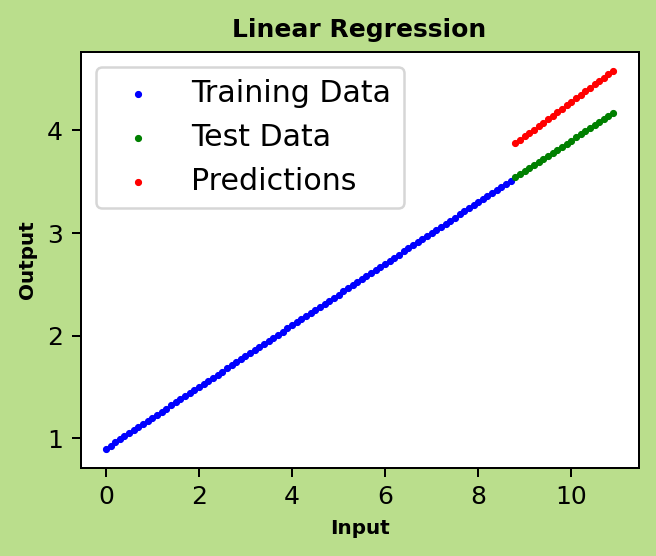

In [23]:
# Visualize
tt = test_preds.detach().numpy()
plot_predictions(predictions=tt)


## **Make Predictions**

- Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (**note**: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


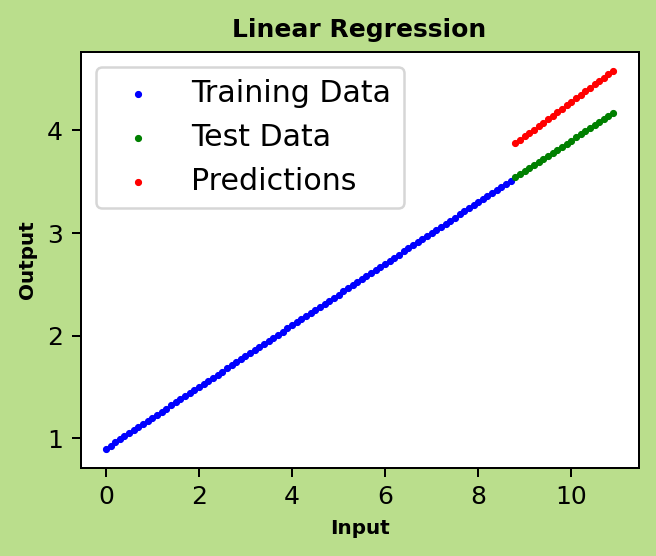

In [24]:
model_0.eval()
with torch.inference_mode():
  new_preds=model_0(X_test)
n = new_preds.detach().numpy()
plot_predictions(predictions=n)

## **Visualize Loss Curves**

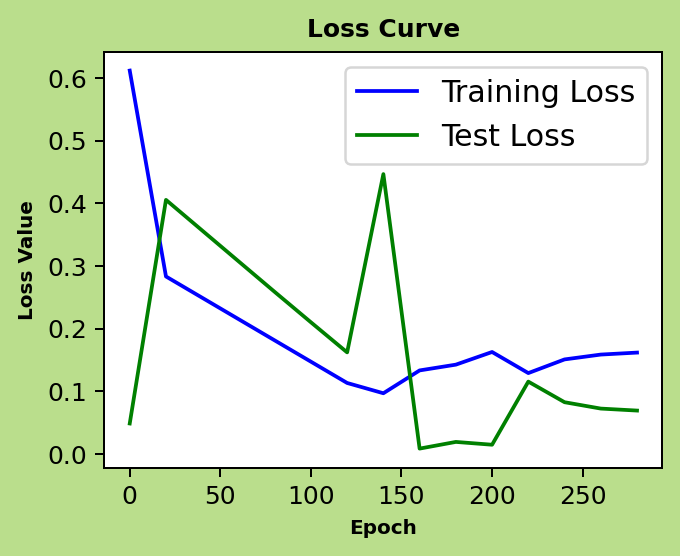

In [25]:
plt.figure(figsize=(4,3), dpi=180, facecolor='#bade8c')

label_font = {'size':8,
              'color':'k',
              'weight':'bold'}
title_font = {'size':10,
              'color':'k',
              'weight':'bold'}
plt.xlabel('Epoch', fontdict=label_font)
plt.ylabel('Loss Value', fontdict=label_font)
plt.title('Loss Curve', fontdict=title_font)

plt.plot(epoch_count, train_loss_values, c='b', label='Training Loss')
plt.plot(epoch_count, test_loss_values, c='g', label='Test Loss')

plt.legend(prop={ 'size':12})
plt.show()

## **Model Learned Parameters**

In [28]:
print('The parameters which model learned:')
for name , parameter in model_0.named_parameters():
  print(f'{name}:{parameter.data}')
print(f'The real parameters:')
print(f'weight: {weight}')
print(f'bias: {bias}')

The parameters which model learned:
weight:tensor([0.3377])
bias:tensor([0.9002])
The real parameters:
weight: 0.3
bias: 0.9


## **Save/Load Model**

- Create a new instance of your model class you made and load in the `state_dict()` you just saved to it.

- Perform predictions on your test data with the loaded model and confirm they match the original model predictions.

In [29]:
# Save
# path
model_path = Path('Models')
model_path.mkdir(parents=True, exist_ok=True)
# name
model_name = 'linear_regression.pth'
# mode save path
model_save_path = model_path / model_name

torch.save(obj=model_0.state_dict(),
           f=model_save_path)


In [30]:
# Load
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(f=model_save_path))
print(f' The paramerters of loaded Model:')
for name , parameter in model_1.named_parameters():
  print(f'{name} : {parameter.data}')

 The paramerters of loaded Model:
weight : tensor([0.3377])
bias : tensor([0.9002])


<ipython-input-30-d1697ed5788f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(f=model_save_path))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


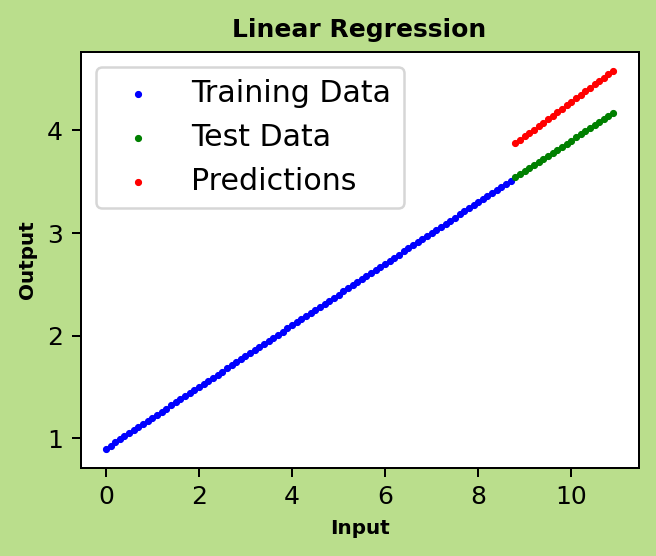

In [32]:
# Perform Predictions
model_1.eval()
with torch.inference_mode():
  model_1_preds = model_1(X_test)
# Check
print(model_1_preds == new_preds)
# Visualize
model_1_preds.detach().numpy()
plot_predictions(predictions=model_1_preds)